# Bike Sharing Assignment


### Problem Statement:
A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario.In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.

_**BoomBikes want to know these:**_
 - Which variables are significant in predicting the demand for shared bikes.
 - How well those variables describe the bike demands
 
_**Goal:**_

To model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

In [1]:
#import required libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')
from sklearn.metrics import r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
# import data from the CSV file
bikeShareData = pd.read_csv("day.csv")
bikeShareData.shape

(730, 16)

In [3]:
bikeShareData.head(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### Describing column details

Dataset Characterstics ::

	- instant: record index
	- dteday : date
	- season : season (1:spring, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2018, 1:2019)
	- mnth : month ( 1 to 12)
	- holiday : weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : temperature in Celsius
	- atemp: feeling temperature in Celsius
	- hum: humidity
	- windspeed: wind speed
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered

In [4]:
bikeShareData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


### Findings from the above operations :
Dataset has 730 rows and 16 columns.
All columns (except dteday) are either float or integer type.
dteday is of date type.
Some fields are categorical in nature, but is of integer/float type.

## Check Data Quality

In [5]:
bikeShareData.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

### Inference: 
There are no missing values in any column.

In [6]:
# checking for duplicate data

bikeShareData_copy = bikeShareData.copy()
bikeShareData_copy.drop_duplicates( subset = None, inplace = True)
bikeShareData_copy.shape

(730, 16)

### Inference:
The shape is same even after removing duplicates.

## Data Cleaning

Identify junk/illegal data in the dataframe and try to remove them

In [7]:
for col in bikeShareData.columns:
    print( col, "\n" )
    print( bikeShareData[col].value_counts( ascending = False ), '\n\n\n' )

instant 

1      1
480    1
482    1
483    1
484    1
      ..
246    1
247    1
248    1
249    1
730    1
Name: instant, Length: 730, dtype: int64 



dteday 

01-01-2018    1
25-04-2019    1
27-04-2019    1
28-04-2019    1
29-04-2019    1
             ..
03-09-2018    1
04-09-2018    1
05-09-2018    1
06-09-2018    1
31-12-2019    1
Name: dteday, Length: 730, dtype: int64 



season 

3    188
2    184
1    180
4    178
Name: season, dtype: int64 



yr 

0    365
1    365
Name: yr, dtype: int64 



mnth 

1     62
3     62
5     62
7     62
8     62
10    62
12    62
4     60
6     60
9     60
11    60
2     56
Name: mnth, dtype: int64 



holiday 

0    709
1     21
Name: holiday, dtype: int64 



weekday 

6    105
0    105
1    105
2    104
4    104
5    104
3    103
Name: weekday, dtype: int64 



workingday 

1    499
0    231
Name: workingday, dtype: int64 



weathersit 

1    463
2    246
3     21
Name: weathersit, dtype: int64 



temp 

26.035000    5
10.899153    5
27.8

### Inference:
There seems to be no junk/illegal data present in the dataset

### Next step is to remove redundant and unwanted columns from the dataset

1. Removing column _instant_ as it is similar to index of rows.
2. Removing the column _dteday_ as we already have month and year split.
3. Removing columns _casual_ and _registered_ as they only indicate the total vehicles rented out.

In [8]:
bikeData_df = bikeShareData.drop(['instant', 'dteday', 'casual', 'registered'], axis = 1)
bikeData_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


# Data Preparation


In [9]:
# Map the data using the variable description provided with the data set

# Maping season column
bikeData_df["season"] = bikeData_df["season"].map( {1:'Spring', 2:'Summer', 3:'Fall', 4:'Winter'} )

# Mapping weathersit
bikeData_df["weathersit"] = bikeData_df["weathersit"].map({1:'Clear', 2:'Mist & Cloudy', 3:'Light Snow & Rain', 4:'Heavy Snow & Rain'})

# Mapping Weekday
bikeData_df["weekday"] = bikeData_df["weekday"].map( {0:"Sunday", 1:"Monday", 2:"Tuesday", 3:"Wednesday", 4:"Thrusday", 5:"Friday", 6:"Saturday"} )

# mapping month according to data dictionary
bikeData_df['mnth'] = bikeData_df['mnth'].map({ 1:"January", 2:"February", 3:"March", 4:"April", 5:"May", 6:"June", 7:"July", 8:"August", 9:"September", 10:"October", 11:"November", 12:"December"})

bikeData_df.head()


,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,0,January,0,Saturday,0,Mist & Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,January,0,Sunday,0,Mist & Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,January,0,Monday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,0,January,0,Tuesday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,0,January,0,Wednesday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


# EDA
## Univariate Analysis

In [10]:
# getting information on numerical and categorical variables 

bikeData_df.nunique()

season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
cnt           695
dtype: int64

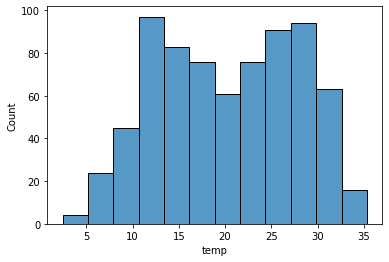

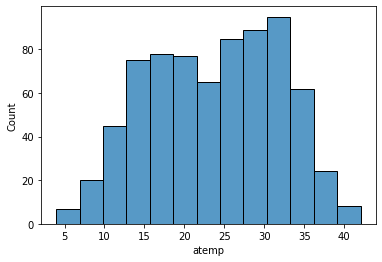

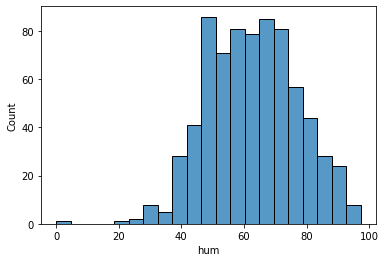

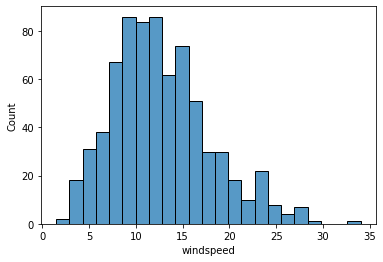

In [11]:
# listing out the numerical variables
num_vars = ['temp', 'atemp', 'hum', 'windspeed']

# listing out the categorical variables
cat_vars = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']

for i in num_vars:
    sns.histplot(x = bikeData_df[i])
    plt.show()

### Inference
- Most of the variables show linear change for a short interval.

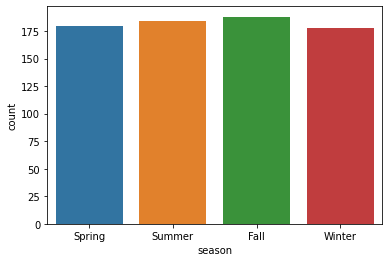

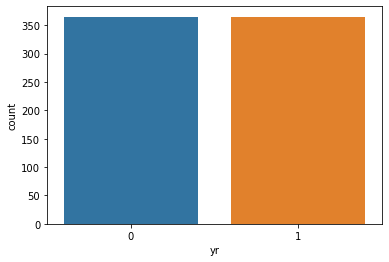

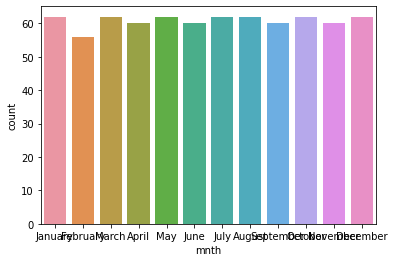

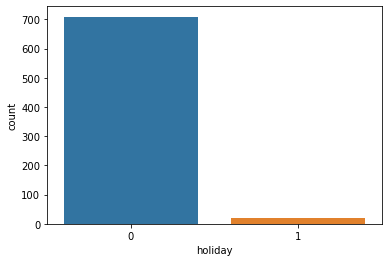

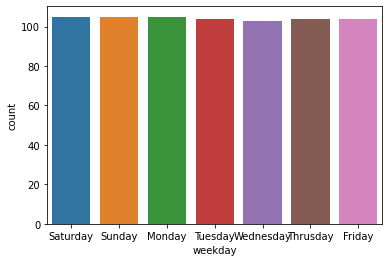

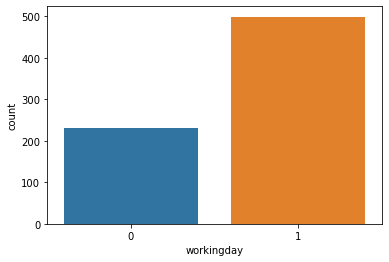

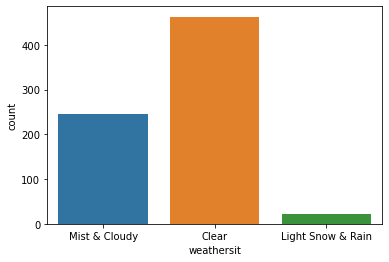

In [12]:
for i in cat_vars:
    sns.countplot(x = bikeData_df[i])
    plt.show()

### Inference:
- The demand remains almost the same for all the possible Season, Year, Month and days of the week.
- The demand is very high on the working day and when there is no holiday.
- The demand is very poor in case of light snow and rainy weather.

## Bivariate Analysis

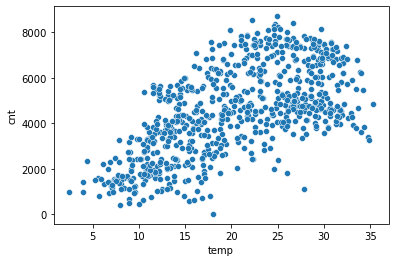

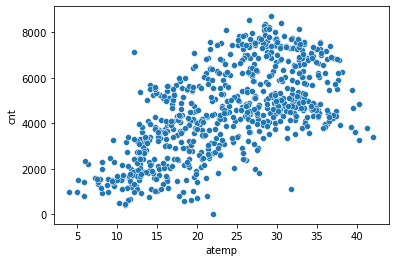

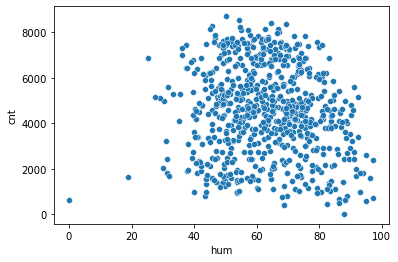

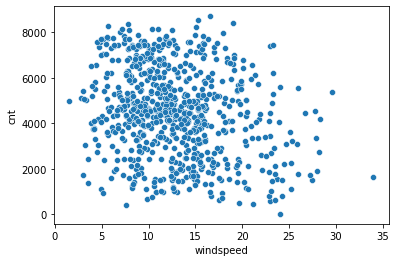

In [13]:
for i in num_vars:
    sns.scatterplot(x = bikeData_df[i], y = bikeData_df['cnt'])
    plt.show()

### Inference
- temp and atemp are almost alike.
- temp and atemp looks to share a linear relation with cnt.

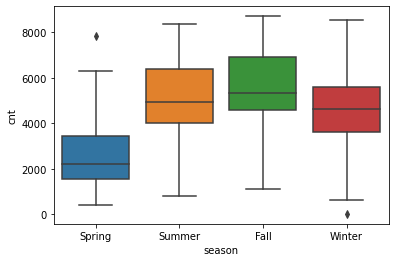

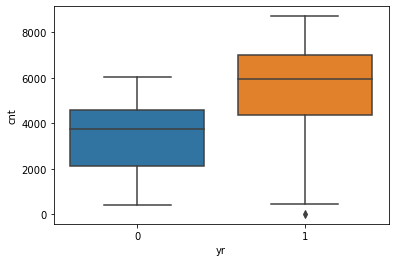

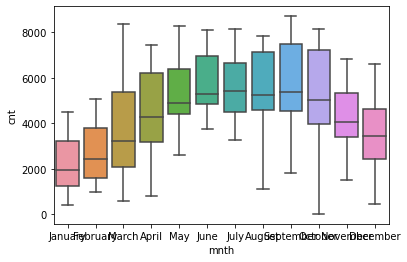

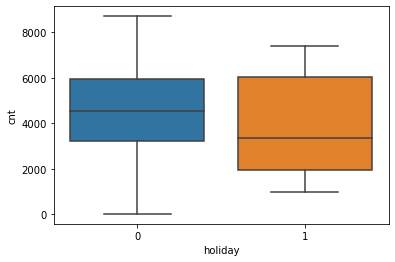

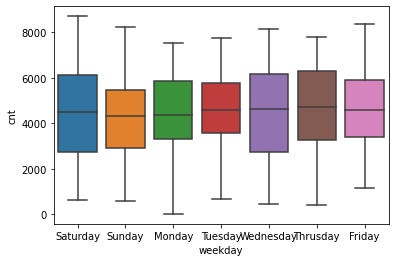

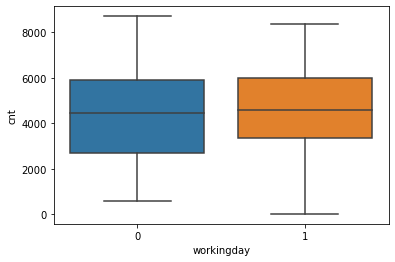

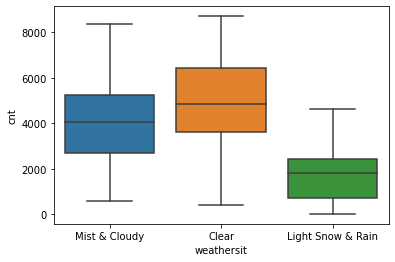

In [14]:
for i in cat_vars:
    sns.boxplot(x = bikeData_df[i], y = bikeData_df['cnt'])
    plt.show()

### Inference:
- from _weathersit_ variable, it can be observed that Light snow and Rain have a negaative impact on the bike demand.
- the demand is more in the warmer months and peaks in the month of september.
- the season of Fall, and summer have the highest demand.
- days of the week have no pattern.
- the demand increased for the second year.

# Multivariate Analysis

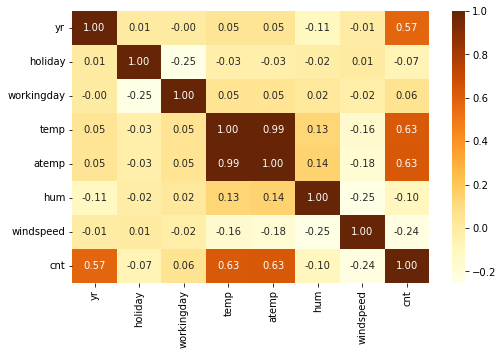

In [15]:
plt.figure( figsize = (8,5) )
sns.heatmap( bikeData_df.corr(), annot = True, fmt = '.2f', cmap = 'YlOrBr')
plt.show()

### Inference 
- Temp and Atemp are highly correlated, we can remove one of them, but as of now keeping them for further analysis.
- Temp and Atemp also have high correlation with cnt variable.

# Pair-Plot


<Figure size 1440x1440 with 0 Axes>

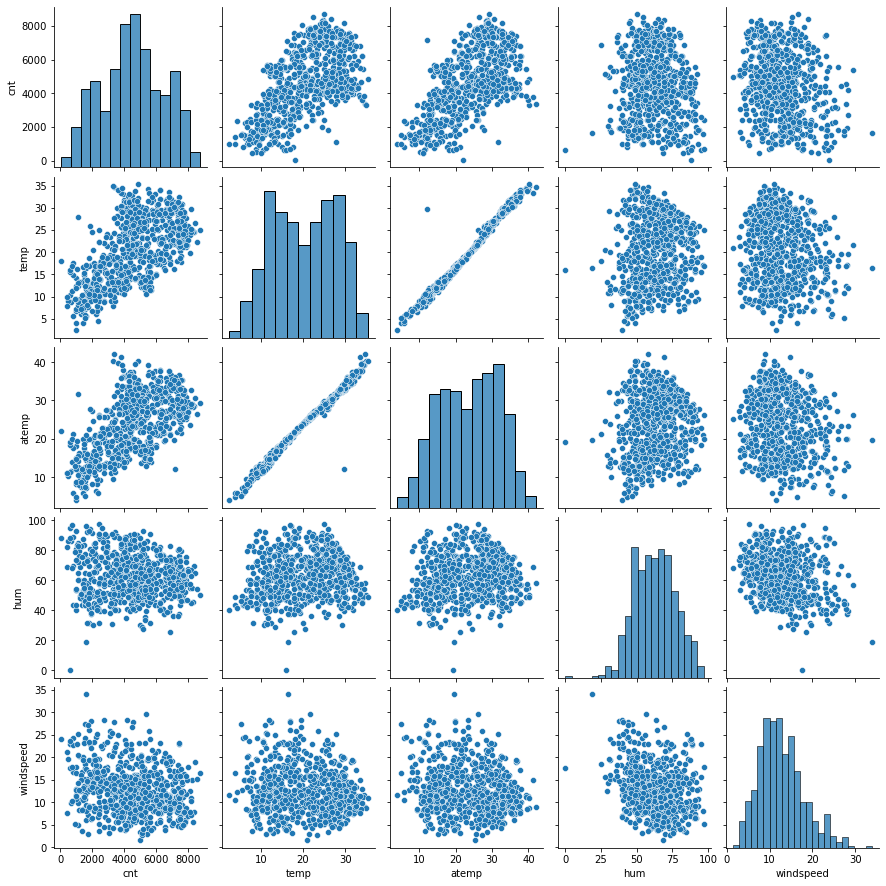

In [16]:
#Draw pairplots for continuous numeric variables using seaborn
plt.figure(figsize = (20,20))
sns.pairplot(data = bikeData_df,vars=['cnt', 'temp', 'atemp', 'hum','windspeed'])
plt.show()

# Creating Dummy Variables

In [17]:
dummy_vars = bikeData_df[['season','mnth','weekday','weathersit']]
dummy = pd.get_dummies( dummy_vars, drop_first = True )

dummy.head()

,season_Spring,season_Summer,season_Winter,mnth_August,mnth_December,mnth_February,mnth_January,mnth_July,mnth_June,mnth_March,...,mnth_October,mnth_September,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thrusday,weekday_Tuesday,weekday_Wednesday,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy
0,1,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,1,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [18]:
bikeData_df = pd.concat( [dummy , bikeData_df], axis =  1)
bikeData_df.head()

,season_Spring,season_Summer,season_Winter,mnth_August,mnth_December,mnth_February,mnth_January,mnth_July,mnth_June,mnth_March,...,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,0,0,0,0,1,0,0,0,...,January,0,Saturday,0,Mist & Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,1,0,0,0,0,0,1,0,0,0,...,January,0,Sunday,0,Mist & Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,1,0,0,0,0,0,1,0,0,0,...,January,0,Monday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,0,0,0,0,1,0,0,0,...,January,0,Tuesday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,0,0,0,0,1,0,0,0,...,January,0,Wednesday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [19]:
bikeData_df = bikeData_df.drop(dummy_vars, axis = 1)
bikeData_df.head()

,season_Spring,season_Summer,season_Winter,mnth_August,mnth_December,mnth_February,mnth_January,mnth_July,mnth_June,mnth_March,...,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
0,1,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,14.110847,18.18125,80.5833,10.749882,985
1,1,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,14.902598,17.68695,69.6087,16.652113,801
2,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,9.305237,11.46350,43.6957,12.522300,1600


In [20]:
bikeData_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   season_Spring                 730 non-null    uint8  
 1   season_Summer                 730 non-null    uint8  
 2   season_Winter                 730 non-null    uint8  
 3   mnth_August                   730 non-null    uint8  
 4   mnth_December                 730 non-null    uint8  
 5   mnth_February                 730 non-null    uint8  
 6   mnth_January                  730 non-null    uint8  
 7   mnth_July                     730 non-null    uint8  
 8   mnth_June                     730 non-null    uint8  
 9   mnth_March                    730 non-null    uint8  
 10  mnth_May                      730 non-null    uint8  
 11  mnth_November                 730 non-null    uint8  
 12  mnth_October                  730 non-null    uint8  
 13  mnth_

# Splitting the Data into Training and Testing Sets
First step is to split data into training and test data set

In [21]:
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(bikeData_df, train_size = 0.75, test_size = 0.25, random_state = 100)

train_df.shape

(547, 30)

In [22]:
test_df.shape

(183, 30)

# Rescaling the Features
Using min-max scaling method

In [23]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [24]:
# Apply scaler() to all the columns except the 'dummy' variables.
num_vars = ['cnt','hum','windspeed','temp','atemp']

train_df[num_vars] = scaler.fit_transform(train_df[num_vars])
train_df.head()

,season_Spring,season_Summer,season_Winter,mnth_August,mnth_December,mnth_February,mnth_January,mnth_July,mnth_June,mnth_March,...,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
311,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0.435124,0.437339,0.743667,0.057471,0.481247
523,0,1,0,0,0,0,0,0,1,0,...,0,0,1,0,1,0.735215,0.680985,0.482181,0.286093,0.887483
381,1,0,0,0,0,0,1,0,0,0,...,0,1,1,0,1,0.391151,0.374375,0.737917,0.659615,0.335136
413,1,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0.358285,0.362754,0.550880,0.319514,0.494248
253,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0.740406,0.695906,0.735509,0.156398,0.578003


In [25]:
test_df[num_vars] = scaler.transform(test_df[num_vars])
test_df.head()

,season_Spring,season_Summer,season_Winter,mnth_August,mnth_December,mnth_February,mnth_January,mnth_July,mnth_June,mnth_March,...,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
184,0,0,0,0,0,0,0,1,0,0,...,0,1,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706
535,0,1,0,0,0,0,0,0,1,0,...,0,0,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034
299,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,1,0.511964,0.496145,0.837699,0.334206,0.303382
221,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400
152,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0.817246,0.741471,0.314298,0.537414,0.569029


In [26]:
train_df.describe()

,season_Spring,season_Summer,season_Winter,mnth_August,mnth_December,mnth_February,mnth_January,mnth_July,mnth_June,mnth_March,...,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
count,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.00000,547.000000,547.000000,547.000000,...,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000
mean,0.257770,0.244973,0.244973,0.093236,0.087751,0.073126,0.08958,0.071298,0.078611,0.096892,...,0.027422,0.349177,0.508227,0.027422,0.669104,0.535543,0.511400,0.650673,0.319317,0.511382
std,0.437807,0.430465,0.430465,0.291029,0.283192,0.260582,0.28584,0.257557,0.269376,0.296082,...,0.163460,0.477146,0.500390,0.163460,0.470966,0.225446,0.211788,0.144515,0.169239,0.225008
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.336998,0.326287,0.538858,0.197844,0.350437
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,1.000000,0.535847,0.521862,0.655216,0.294101,0.514266
75%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,0.000000,1.000000,0.735215,0.688457,0.753113,0.413761,0.682697
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


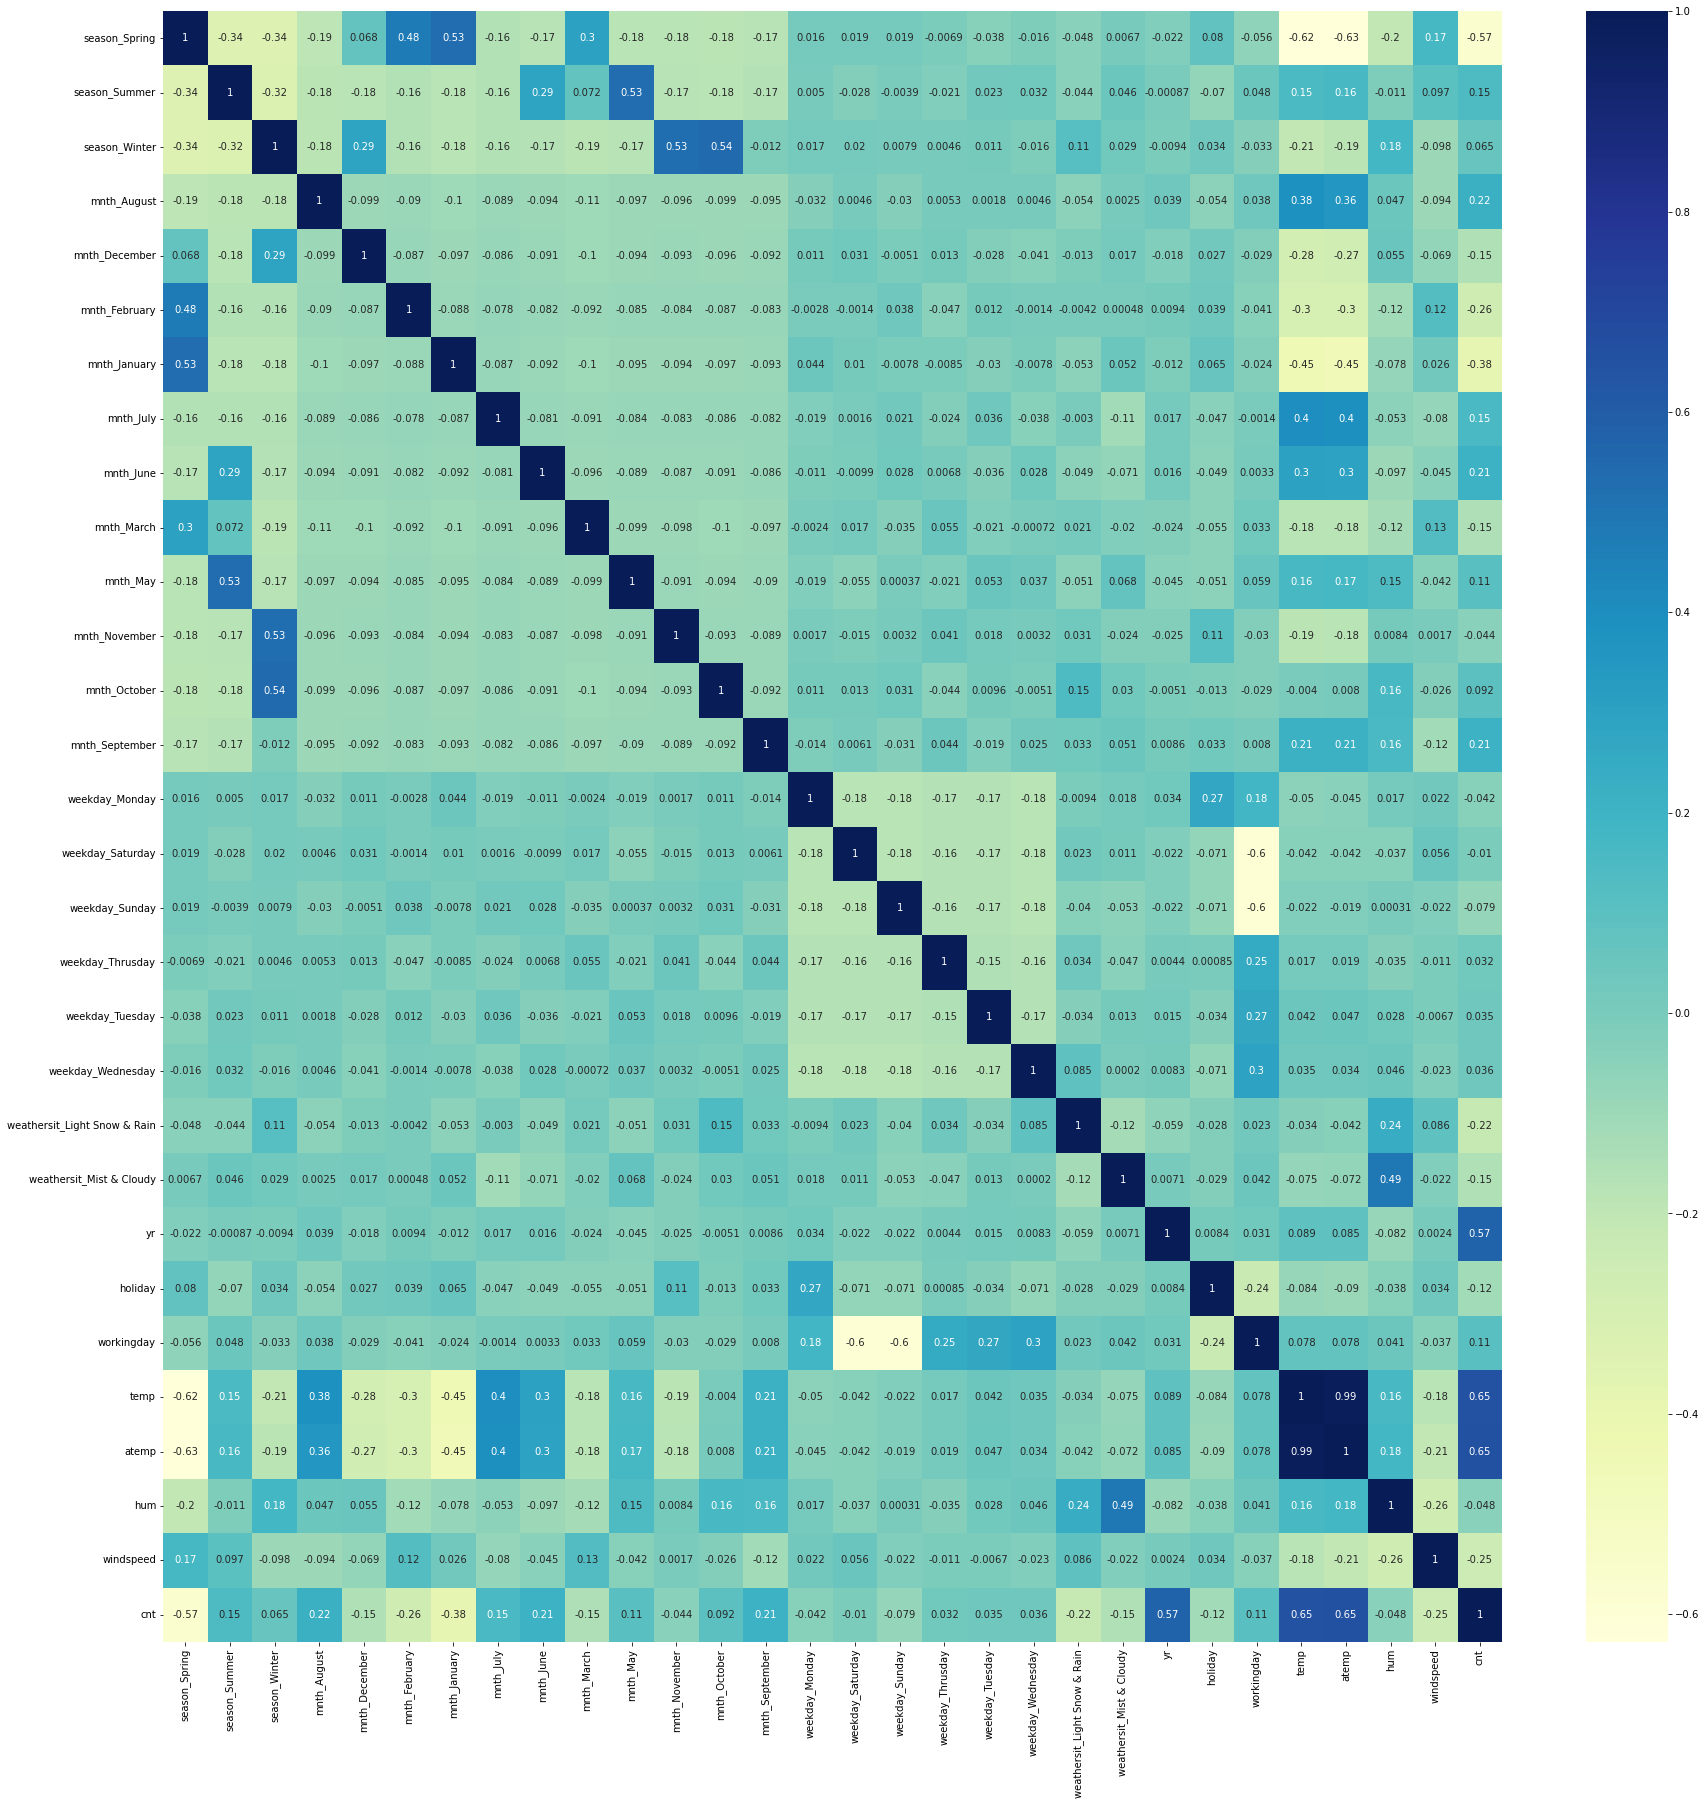

In [27]:
# check for the highly corelated co-efficients

plt.figure(figsize = (30, 30))
sns.heatmap(train_df.corr(), annot = True, cmap="YlGnBu")
plt.show()

As can be seen from the map, atemp and temp seems to be correlated to the target variable cnt. Since, not much can be stated about the other independent variableswe need to build a model using all the columns.

In [28]:
y_train = train_df.pop('cnt')
X_train = train_df

y_test = test_df.pop('cnt')
X_test = test_df

## Building linear regression model
Using a combined approach.

In [29]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [30]:
# Try RFE with 20 output features
estimator = LinearRegression()
selector = RFE(estimator, n_features_to_select = 20)            
selector = selector.fit(X_train, y_train)

selectedFeatures = X_train.columns[selector.support_]

## Model1

In [31]:
X_train_sm = sm.add_constant(X_train[selectedFeatures])
X_test_sm = sm.add_constant(X_test[selectedFeatures])

model1 = sm.OLS(y_train, X_train_sm)
res1 = model1.fit()
res1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.850
Method:                 Least Squares   F-statistic:                     163.4
Date:                Wed, 13 Dec 2023   Prob (F-statistic):          1.26e-206
Time:                        18:37:32   Log-Likelihood:                 568.17
No. Observations:                 547   AIC:                            -1096.
Df Residuals:                     527   BIC:                            -1010.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            0.2360      0.028      8.333      0.000       0.180       0.292
season_Spring                   -0.0580      0.021     -2.795      0.005      -0.099      -0.017
season_Summer                    0.0382      0.015      2.597      0.010       0.009       0.067
season_Winter                    0.1080      0.017      6.391      0.000       0.075       0.141
mnth_December                   -0.0552      0.017     -3.243      0.001      -0.089      -0.022
mnth_February                   -0.0323      0.020     -1.641      0.101      -0.071       0.006
mnth_January                    -0.0589      0.020     -2.963      0.003      -0.098      -0.020
mnth_July                       -0.0532      0.018     -3.008      0.003      -0.088      -0.018
mnth_November                   -0.0505      0.018     -2.800      0.005      -0.086      -0.015
mnth_September                   0.0693      0.016      4.345      0.000       0.038       0.101
weekday_Saturday                 0.1042      0.011      9.279      0.000       0.082       0.126
weekday_Sunday                   0.0501      0.011      4.372      0.000       0.028       0.073
weathersit_Light Snow & Rain    -0.2598      0.026    -10.109      0.000      -0.310      -0.209
weathersit_Mist & Cloudy        -0.0588      0.010     -5.953      0.000      -0.078      -0.039
yr                               0.2295      0.008     30.187      0.000       0.215       0.244
holiday                         -0.0140      0.020     -0.695      0.488      -0.054       0.026
workingday                       0.0957      0.009     10.203      0.000       0.077       0.114
temp                             0.4502      0.130      3.471      0.001       0.195       0.705
atemp                            0.0130      0.132      0.098      0.922      -0.247       0.273
hum                             -0.1474      0.036     -4.089      0.000      -0.218      -0.077
windspeed                       -0.1834      0.025     -7.463      0.000      -0.232      -0.135
==============================================================================
Omnibus:                       88.123   Durbin-Watson:                   2.057
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              241.517
Skew:                          -0.793   Prob(JB):                     3.59e-53
Kurtosis:                       5.842   Cond. No.                     6.32e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.46e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [32]:
vif = pd.DataFrame()
vif['Features'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
print(vif.sort_values(by='VIF',ascending=False))

                        Features    VIF
10              weekday_Saturday    inf
11                weekday_Sunday    inf
16                    workingday    inf
15                       holiday    inf
17                          temp  61.33
18                         atemp  56.48
1                  season_Spring   5.93
3                  season_Winter   3.80
2                  season_Summer   2.88
6                   mnth_January   2.32
19                           hum   1.95
5                  mnth_February   1.89
8                  mnth_November   1.76
4                  mnth_December   1.67
13      weathersit_Mist & Cloudy   1.59
7                      mnth_July   1.49
9                 mnth_September   1.35
12  weathersit_Light Snow & Rain   1.27
20                     windspeed   1.24
14                            yr   1.04
0                          const   0.00


## Model2

In [33]:
# dropping `atemp` column as the p-value is > 0.05

X_train_sm = X_train_sm.drop(['atemp'], axis = 1)
X_test_sm = X_test_sm.drop(['atemp'], axis = 1)

model2 = sm.OLS(y_train, X_train_sm)
res2 = model2.fit()
res2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.850
Method:                 Least Squares   F-statistic:                     172.8
Date:                Wed, 13 Dec 2023   Prob (F-statistic):          9.51e-208
Time:                        18:37:32   Log-Likelihood:                 568.17
No. Observations:                 547   AIC:                            -1098.
Df Residuals:                     528   BIC:                            -1017.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            0.2359      0.028      8.343      0.000       0.180       0.292
season_Spring                   -0.0578      0.021     -2.808      0.005      -0.098      -0.017
season_Summer                    0.0385      0.014      2.667      0.008       0.010       0.067
season_Winter                    0.1083      0.017      6.514      0.000       0.076       0.141
mnth_December                   -0.0552      0.017     -3.245      0.001      -0.089      -0.022
mnth_February                   -0.0323      0.020     -1.643      0.101      -0.071       0.006
mnth_January                    -0.0590      0.020     -2.971      0.003      -0.098      -0.020
mnth_July                       -0.0530      0.018     -3.011      0.003      -0.088      -0.018
mnth_November                   -0.0504      0.018     -2.801      0.005      -0.086      -0.015
mnth_September                   0.0694      0.016      4.363      0.000       0.038       0.101
weekday_Saturday                 0.1042      0.011      9.289      0.000       0.082       0.126
weekday_Sunday                   0.0501      0.011      4.376      0.000       0.028       0.073
weathersit_Light Snow & Rain    -0.2600      0.026    -10.156      0.000      -0.310      -0.210
weathersit_Mist & Cloudy        -0.0588      0.010     -5.968      0.000      -0.078      -0.039
yr                               0.2295      0.008     30.217      0.000       0.215       0.244
holiday                         -0.0141      0.020     -0.701      0.483      -0.054       0.025
workingday                       0.0957      0.009     10.212      0.000       0.077       0.114
temp                             0.4624      0.036     12.973      0.000       0.392       0.532
hum                             -0.1472      0.036     -4.095      0.000      -0.218      -0.077
windspeed                       -0.1838      0.024     -7.623      0.000      -0.231      -0.136
==============================================================================
Omnibus:                       87.977   Durbin-Watson:                   2.057
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              241.103
Skew:                          -0.792   Prob(JB):                     4.42e-53
Kurtosis:                       5.841   Cond. No.                     5.99e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.55e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [34]:
vif = pd.DataFrame()
vif['Features'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
print(vif.sort_values(by='VIF',ascending=False))

                        Features   VIF
10              weekday_Saturday   inf
11                weekday_Sunday   inf
15                       holiday   inf
16                    workingday   inf
1                  season_Spring  5.83
17                          temp  4.64
3                  season_Winter  3.68
2                  season_Summer  2.78
6                   mnth_January  2.32
18                           hum  1.94
5                  mnth_February  1.89
8                  mnth_November  1.76
4                  mnth_December  1.67
13      weathersit_Mist & Cloudy  1.59
7                      mnth_July  1.48
9                 mnth_September  1.35
12  weathersit_Light Snow & Rain  1.26
19                     windspeed  1.20
14                            yr  1.04
0                          const  0.00


## Model3

In [35]:
# dropping `holiday` column as the p-value > 0.05

X_train_sm = X_train_sm.drop(['holiday'], axis = 1)
X_test_sm = X_test_sm.drop(['holiday'], axis = 1)

model3 = sm.OLS(y_train, X_train_sm)
res3 = model3.fit()
res3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.850
Method:                 Least Squares   F-statistic:                     172.8
Date:                Wed, 13 Dec 2023   Prob (F-statistic):          9.51e-208
Time:                        18:37:32   Log-Likelihood:                 568.17
No. Observations:                 547   AIC:                            -1098.
Df Residuals:                     528   BIC:                            -1017.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            0.2219      0.042      5.252      0.000       0.139       0.305
season_Spring                   -0.0578      0.021     -2.808      0.005      -0.098      -0.017
season_Summer                    0.0385      0.014      2.667      0.008       0.010       0.067
season_Winter                    0.1083      0.017      6.514      0.000       0.076       0.141
mnth_December                   -0.0552      0.017     -3.245      0.001      -0.089      -0.022
mnth_February                   -0.0323      0.020     -1.643      0.101      -0.071       0.006
mnth_January                    -0.0590      0.020     -2.971      0.003      -0.098      -0.020
mnth_July                       -0.0530      0.018     -3.011      0.003      -0.088      -0.018
mnth_November                   -0.0504      0.018     -2.801      0.005      -0.086      -0.015
mnth_September                   0.0694      0.016      4.363      0.000       0.038       0.101
weekday_Saturday                 0.1182      0.025      4.761      0.000       0.069       0.167
weekday_Sunday                   0.0642      0.025      2.586      0.010       0.015       0.113
weathersit_Light Snow & Rain    -0.2600      0.026    -10.156      0.000      -0.310      -0.210
weathersit_Mist & Cloudy        -0.0588      0.010     -5.968      0.000      -0.078      -0.039
yr                               0.2295      0.008     30.217      0.000       0.215       0.244
workingday                       0.1098      0.023      4.696      0.000       0.064       0.156
temp                             0.4624      0.036     12.973      0.000       0.392       0.532
hum                             -0.1472      0.036     -4.095      0.000      -0.218      -0.077
windspeed                       -0.1838      0.024     -7.623      0.000      -0.231      -0.136
==============================================================================
Omnibus:                       87.977   Durbin-Watson:                   2.057
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              241.103
Skew:                          -0.792   Prob(JB):                     4.42e-53
Kurtosis:                       5.841   Cond. No.                         26.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [36]:
vif = pd.DataFrame()
vif['Features'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
print(vif.sort_values(by='VIF',ascending=False))

                        Features     VIF
0                          const  128.49
15                    workingday    8.72
1                  season_Spring    5.83
10              weekday_Saturday    5.72
11                weekday_Sunday    5.72
16                          temp    4.64
3                  season_Winter    3.68
2                  season_Summer    2.78
6                   mnth_January    2.32
17                           hum    1.94
5                  mnth_February    1.89
8                  mnth_November    1.76
4                  mnth_December    1.67
13      weathersit_Mist & Cloudy    1.59
7                      mnth_July    1.48
9                 mnth_September    1.35
12  weathersit_Light Snow & Rain    1.26
18                     windspeed    1.20
14                            yr    1.04


## Model4

In [37]:
# dropping `mnth_February` column as the p-value is > 0.05

X_train_sm = X_train_sm.drop(['mnth_February'], axis = 1)
X_test_sm = X_test_sm.drop(['mnth_February'], axis = 1)

model4 = sm.OLS(y_train, X_train_sm)
res4 = model4.fit()
res4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     182.2
Date:                Wed, 13 Dec 2023   Prob (F-statistic):          2.65e-208
Time:                        18:37:32   Log-Likelihood:                 566.77
No. Observations:                 547   AIC:                            -1098.
Df Residuals:                     529   BIC:                            -1020.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            0.2108      0.042      5.046      0.000       0.129       0.293
season_Spring                   -0.0671      0.020     -3.389      0.001      -0.106      -0.028
season_Summer                    0.0414      0.014      2.886      0.004       0.013       0.070
season_Winter                    0.1096      0.017      6.587      0.000       0.077       0.142
mnth_December                   -0.0458      0.016     -2.856      0.004      -0.077      -0.014
mnth_January                    -0.0413      0.017     -2.472      0.014      -0.074      -0.008
mnth_July                       -0.0539      0.018     -3.058      0.002      -0.089      -0.019
mnth_November                   -0.0458      0.018     -2.573      0.010      -0.081      -0.011
mnth_September                   0.0708      0.016      4.452      0.000       0.040       0.102
weekday_Saturday                 0.1198      0.025      4.822      0.000       0.071       0.169
weekday_Sunday                   0.0654      0.025      2.629      0.009       0.017       0.114
weathersit_Light Snow & Rain    -0.2584      0.026    -10.087      0.000      -0.309      -0.208
weathersit_Mist & Cloudy        -0.0586      0.010     -5.942      0.000      -0.078      -0.039
yr                               0.2288      0.008     30.124      0.000       0.214       0.244
workingday                       0.1112      0.023      4.752      0.000       0.065       0.157
temp                             0.4767      0.035     13.771      0.000       0.409       0.545
hum                             -0.1499      0.036     -4.168      0.000      -0.221      -0.079
windspeed                       -0.1831      0.024     -7.581      0.000      -0.230      -0.136
==============================================================================
Omnibus:                       82.384   Durbin-Watson:                   2.057
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              224.406
Skew:                          -0.745   Prob(JB):                     1.87e-49
Kurtosis:                       5.762   Cond. No.                         26.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [38]:
vif = pd.DataFrame()
vif['Features'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
print(vif.sort_values(by='VIF',ascending=False))

                        Features     VIF
0                          const  125.21
14                    workingday    8.71
10                weekday_Sunday    5.71
9               weekday_Saturday    5.71
1                  season_Spring    5.38
15                          temp    4.36
3                  season_Winter    3.67
2                  season_Summer    2.74
16                           hum    1.94
7                  mnth_November    1.72
5                   mnth_January    1.64
12      weathersit_Mist & Cloudy    1.59
4                  mnth_December    1.48
6                      mnth_July    1.48
8                 mnth_September    1.34
11  weathersit_Light Snow & Rain    1.26
17                     windspeed    1.20
13                            yr    1.03


## Model5

In [39]:
# dropping `workingday` column as the VIF > 5

X_train_sm = X_train_sm.drop(['workingday'], axis = 1)
X_test_sm = X_test_sm.drop(['workingday'], axis = 1)

model5 = sm.OLS(y_train, X_train_sm)
res5 = model5.fit()
res5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     184.7
Date:                Wed, 13 Dec 2023   Prob (F-statistic):          1.15e-204
Time:                        18:37:32   Log-Likelihood:                 555.34
No. Observations:                 547   AIC:                            -1077.
Df Residuals:                     530   BIC:                            -1004.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            0.3235      0.035      9.221      0.000       0.255       0.392
season_Spring                   -0.0721      0.020     -3.575      0.000      -0.112      -0.032
season_Summer                    0.0406      0.015      2.772      0.006       0.012       0.069
season_Winter                    0.1092      0.017      6.432      0.000       0.076       0.143
mnth_December                   -0.0499      0.016     -3.050      0.002      -0.082      -0.018
mnth_January                    -0.0446      0.017     -2.620      0.009      -0.078      -0.011
mnth_July                       -0.0531      0.018     -2.955      0.003      -0.088      -0.018
mnth_November                   -0.0561      0.018     -3.112      0.002      -0.092      -0.021
mnth_September                   0.0657      0.016      4.059      0.000       0.034       0.098
weekday_Saturday                 0.0131      0.011      1.205      0.229      -0.008       0.034
weekday_Sunday                  -0.0414      0.011     -3.815      0.000      -0.063      -0.020
weathersit_Light Snow & Rain    -0.2547      0.026     -9.750      0.000      -0.306      -0.203
weathersit_Mist & Cloudy        -0.0571      0.010     -5.680      0.000      -0.077      -0.037
yr                               0.2286      0.008     29.499      0.000       0.213       0.244
temp                             0.4731      0.035     13.401      0.000       0.404       0.543
hum                             -0.1496      0.037     -4.077      0.000      -0.222      -0.078
windspeed                       -0.1868      0.025     -7.587      0.000      -0.235      -0.138
==============================================================================
Omnibus:                       98.529   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              278.826
Skew:                          -0.873   Prob(JB):                     2.84e-61
Kurtosis:                       6.030   Cond. No.                         21.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [40]:
vif = pd.DataFrame()
vif['Features'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
print(vif.sort_values(by='VIF',ascending=False))

                        Features    VIF
0                          const  84.86
1                  season_Spring   5.37
14                          temp   4.36
3                  season_Winter   3.67
2                  season_Summer   2.73
15                           hum   1.94
7                  mnth_November   1.69
5                   mnth_January   1.63
12      weathersit_Mist & Cloudy   1.59
4                  mnth_December   1.48
6                      mnth_July   1.48
8                 mnth_September   1.34
11  weathersit_Light Snow & Rain   1.26
16                     windspeed   1.19
10                weekday_Sunday   1.05
9               weekday_Saturday   1.04
13                            yr   1.03


## Model6

In [41]:
# dropping `weekday_Saturday` column as the p-value is > 0.05

X_train_sm = X_train_sm.drop(['weekday_Saturday'], axis = 1)
X_test_sm = X_test_sm.drop(['weekday_Saturday'], axis = 1)

model6 = sm.OLS(y_train, X_train_sm)
res6 = model6.fit()
res6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.7
Date:                Wed, 13 Dec 2023   Prob (F-statistic):          1.66e-205
Time:                        18:37:32   Log-Likelihood:                 554.59
No. Observations:                 547   AIC:                            -1077.
Df Residuals:                     531   BIC:                            -1008.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            0.3272      0.035      9.362      0.000       0.259       0.396
season_Spring                   -0.0725      0.020     -3.592      0.000      -0.112      -0.033
season_Summer                    0.0403      0.015      2.748      0.006       0.011       0.069
season_Winter                    0.1094      0.017      6.443      0.000       0.076       0.143
mnth_December                   -0.0498      0.016     -3.041      0.002      -0.082      -0.018
mnth_January                    -0.0448      0.017     -2.626      0.009      -0.078      -0.011
mnth_July                       -0.0527      0.018     -2.931      0.004      -0.088      -0.017
mnth_November                   -0.0569      0.018     -3.157      0.002      -0.092      -0.021
mnth_September                   0.0659      0.016      4.069      0.000       0.034       0.098
weekday_Sunday                  -0.0437      0.011     -4.091      0.000      -0.065      -0.023
weathersit_Light Snow & Rain    -0.2542      0.026     -9.727      0.000      -0.306      -0.203
weathersit_Mist & Cloudy        -0.0569      0.010     -5.653      0.000      -0.077      -0.037
yr                               0.2283      0.008     29.465      0.000       0.213       0.244
temp                             0.4719      0.035     13.366      0.000       0.403       0.541
hum                             -0.1512      0.037     -4.120      0.000      -0.223      -0.079
windspeed                       -0.1856      0.025     -7.541      0.000      -0.234      -0.137
==============================================================================
Omnibus:                       95.144   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              279.401
Skew:                          -0.832   Prob(JB):                     2.13e-61
Kurtosis:                       6.081   Cond. No.                         20.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [42]:
vif = pd.DataFrame()
vif['Features'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
print(vif.sort_values(by='VIF',ascending=False))

                        Features    VIF
0                          const  84.18
1                  season_Spring   5.37
13                          temp   4.36
3                  season_Winter   3.67
2                  season_Summer   2.73
14                           hum   1.93
7                  mnth_November   1.69
5                   mnth_January   1.63
11      weathersit_Mist & Cloudy   1.59
4                  mnth_December   1.48
6                      mnth_July   1.48
8                 mnth_September   1.34
10  weathersit_Light Snow & Rain   1.25
15                     windspeed   1.19
12                            yr   1.03
9                 weekday_Sunday   1.01


## Model7

In [43]:
# dropping `season_Spring` column as the VIF > 5

X_train_sm = X_train_sm.drop(['season_Spring'], axis = 1)
X_test_sm = X_test_sm.drop(['season_Spring'], axis = 1)

model7 = sm.OLS(y_train, X_train_sm)
res7 = model7.fit()
res7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     205.3
Date:                Wed, 13 Dec 2023   Prob (F-statistic):          6.48e-204
Time:                        18:37:32   Log-Likelihood:                 548.02
No. Observations:                 547   AIC:                            -1066.
Df Residuals:                     532   BIC:                            -1001.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            0.2494      0.028      8.992      0.000       0.195       0.304
season_Summer                    0.0765      0.011      7.137      0.000       0.055       0.098
season_Winter                    0.1511      0.013     12.048      0.000       0.126       0.176
mnth_December                   -0.0432      0.016     -2.628      0.009      -0.075      -0.011
mnth_January                    -0.0483      0.017     -2.804      0.005      -0.082      -0.014
mnth_July                       -0.0401      0.018     -2.247      0.025      -0.075      -0.005
mnth_November                   -0.0450      0.018     -2.511      0.012      -0.080      -0.010
mnth_September                   0.0836      0.016      5.359      0.000       0.053       0.114
weekday_Sunday                  -0.0440      0.011     -4.075      0.000      -0.065      -0.023
weathersit_Light Snow & Rain    -0.2469      0.026     -9.372      0.000      -0.299      -0.195
weathersit_Mist & Cloudy        -0.0543      0.010     -5.348      0.000      -0.074      -0.034
yr                               0.2265      0.008     28.967      0.000       0.211       0.242
temp                             0.5595      0.026     21.664      0.000       0.509       0.610
hum                             -0.1636      0.037     -4.429      0.000      -0.236      -0.091
windspeed                       -0.1933      0.025     -7.797      0.000      -0.242      -0.145
==============================================================================
Omnibus:                       84.655   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              211.479
Skew:                          -0.794   Prob(JB):                     1.20e-46
Kurtosis:                       5.600   Cond. No.                         18.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [44]:
vif = pd.DataFrame()
vif['Features'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
print(vif.sort_values(by='VIF',ascending=False))

                        Features    VIF
0                          const  51.85
12                          temp   2.28
2                  season_Winter   1.96
13                           hum   1.92
4                   mnth_January   1.63
6                  mnth_November   1.63
10      weathersit_Mist & Cloudy   1.58
3                  mnth_December   1.46
1                  season_Summer   1.43
5                      mnth_July   1.42
9   weathersit_Light Snow & Rain   1.25
7                 mnth_September   1.21
14                     windspeed   1.18
11                            yr   1.03
8                 weekday_Sunday   1.01


In [45]:
y_test_pred = res7.predict(X_test_sm)
r2_score(y_test,y_test_pred)

0.7966228418569457

# Model Evaluation
## Residual Analysis

In [46]:
y_train_pred = res7.predict(X_train_sm)
y_train_pred

311    0.466178
523    0.829571
381    0.343975
413    0.524459
253    0.552693
         ...   
578    0.811892
53     0.269944
350    0.263883
79     0.303805
520    0.661047
Length: 547, dtype: float64

Text(0.5, 0, 'Errors')

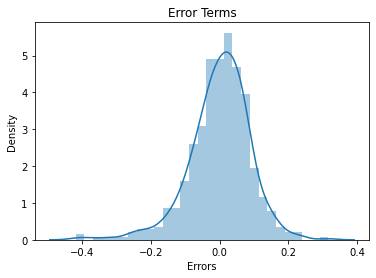

In [47]:
#Plot a histogram of the error terms

sns.distplot(y_train - y_train_pred)
plt.title('Error Terms')
plt.xlabel('Errors')

Errors are normally distribured here with mean 0. So everything seems to be fine

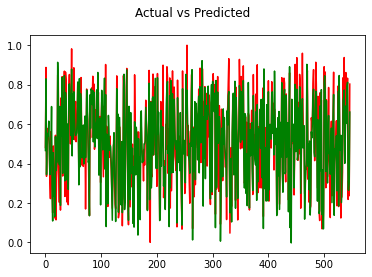

In [48]:
# Actual vs Predicted
c = [i for i in range(0,len(X_train),1)]
plt.plot(c,y_train, color="red")
plt.plot(c,y_train_pred, color="green")
plt.suptitle('Actual vs Predicted')
plt.show()

The pattern almost looks the same. So, the model looks plausible.

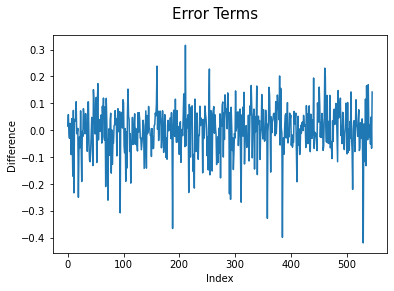

In [49]:
# Error Terms
c = [i for i in range(0, len( X_train ) , 1 )]
plt.plot(c , y_train - y_train_pred)
plt.suptitle('Error Terms', fontsize = 15)
plt.xlabel('Index')
plt.ylabel('Difference')
plt.show()


We see the error terms are independent of each other.

### Calculating the R2 score

In [50]:
#Print R-squared Value
r2_score(y_train,y_train_pred)

0.8437898342811483

The r2 score is same as we predicted in the last model

### Linearity check for the model


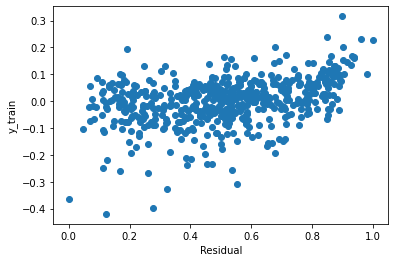

In [51]:
# scatter plot for the check
residual = (y_train - y_train_pred)
plt.scatter(y_train,residual)
plt.ylabel("y_train")
plt.xlabel("Residual")
plt.show()

## Predicting values for test data set

In [52]:
#Predict the values for test data
y_test_pred = res7.predict(X_test_sm)

### Calculating the R2 score

In [53]:
r2_score(y_test,y_test_pred)

0.7966228418569457

The r2 prediction for test dataset is almost 0.8 which is a decent number. 

### Homoscedacity

Text(0, 0.5, 'y_test_pred')

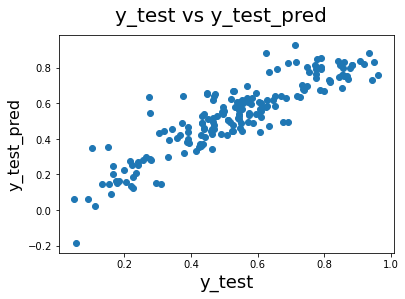

In [54]:
# Plotting y_test and y_test_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_test_pred', fontsize = 16)

We can observe that variance of the residuals (error terms) is constant across predictions. i.e error term does not vary much as the value of the predictor variable changes.

### Plot Test vs Predicted test values

In [55]:
#Function to plot Actual vs Predicted
#Takes Actual and PRedicted values as input along with the scale and Title to indicate which data
def plot_act_pred(act,pred,scale,dataname):
    c = [i for i in range(1,scale,1)]
    fig = plt.figure(figsize=(14,5))
    plt.plot(c,act, color="blue", linewidth=2.5, linestyle="-")
    plt.plot(c,pred, color="red",  linewidth=2.5, linestyle="-")
    fig.suptitle('Actual and Predicted - '+dataname, fontsize=20)              # Plot heading 
    plt.xlabel('Index', fontsize=18)                               # X-label
    plt.ylabel('Counts', fontsize=16)                               # Y-label

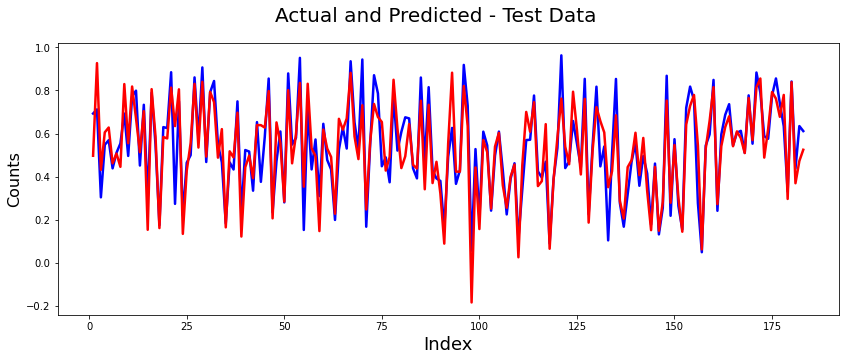

In [56]:
#Plot Actual vs Predicted for Test Data
plot_act_pred(y_test,y_test_pred,len(y_test)+1,'Test Data')

As we can see predictions for test data is very close to actuals

## Making Predictions

In [57]:
bikeShareData.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [58]:
res7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     205.3
Date:                Wed, 13 Dec 2023   Prob (F-statistic):          6.48e-204
Time:                        18:37:33   Log-Likelihood:                 548.02
No. Observations:                 547   AIC:                            -1066.
Df Residuals:                     532   BIC:                            -1001.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            0.2494      0.028      8.992      0.000       0.195       0.304
season_Summer                    0.0765      0.011      7.137      0.000       0.055       0.098
season_Winter                    0.1511      0.013     12.048      0.000       0.126       0.176
mnth_December                   -0.0432      0.016     -2.628      0.009      -0.075      -0.011
mnth_January                    -0.0483      0.017     -2.804      0.005      -0.082      -0.014
mnth_July                       -0.0401      0.018     -2.247      0.025      -0.075      -0.005
mnth_November                   -0.0450      0.018     -2.511      0.012      -0.080      -0.010
mnth_September                   0.0836      0.016      5.359      0.000       0.053       0.114
weekday_Sunday                  -0.0440      0.011     -4.075      0.000      -0.065      -0.023
weathersit_Light Snow & Rain    -0.2469      0.026     -9.372      0.000      -0.299      -0.195
weathersit_Mist & Cloudy        -0.0543      0.010     -5.348      0.000      -0.074      -0.034
yr                               0.2265      0.008     28.967      0.000       0.211       0.242
temp                             0.5595      0.026     21.664      0.000       0.509       0.610
hum                             -0.1636      0.037     -4.429      0.000      -0.236      -0.091
windspeed                       -0.1933      0.025     -7.797      0.000      -0.242      -0.145
==============================================================================
Omnibus:                       84.655   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              211.479
Skew:                          -0.794   Prob(JB):                     1.20e-46
Kurtosis:                       5.600   Cond. No.                         18.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Analysing the above model, the comapany should focus on the following features:
 - Company should focus on expanding business during summer and winter.
 - Company should focus on expanding business during September.
 - Based on previous data it is expected to have a boom in number of users once situation comes back to normal, compared to 2019.
 - There would be less bookings during Light Snow or Rain, they could probably use this time to serive the bikes without having bussiness impact.

## Significant variables to predict the demand for shared bikes
- Season
- Months (December, January, July, November, September)
- Weekday (Sunday)
- weather
- year
- temperature
- humidity
- windspeed